<a href="https://colab.research.google.com/github/TAUforPython/nonstationary/blob/main/%D0%BD%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://link.springer.com/book/10.1007/978-3-031-46768-4

ссылка на хороший ученибник по решению дифференциальных уравнений в Python

# prerequisite

https://habr.com/ru/articles/559062/

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

In [2]:
gen_pop = np.trunc(stats.norm.rvs(loc=80, scale=5, size=1000))
gen_pop[gen_pop>100]=100
print(f'mean = {gen_pop.mean():.3}')
print(f'std = {gen_pop.std():.3}')

mean = 79.6
std = 4.91


Теперь мы можем вычислить Z-статистику:

\begin{equation}
Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
\end{equation}


где  x- это среднее значение для нашей выборки, \mu и \sigma среднее значение и стандартное отклонение для генеральной совокупности, а n- размер выборки. Вот среднее нашей выборки:

(array([  4.,  23.,  82., 242., 224., 270., 115.,  30.,   9.,   1.]),
 array([63. , 66.6, 70.2, 73.8, 77.4, 81. , 84.6, 88.2, 91.8, 95.4, 99. ]),
 <BarContainer object of 10 artists>)

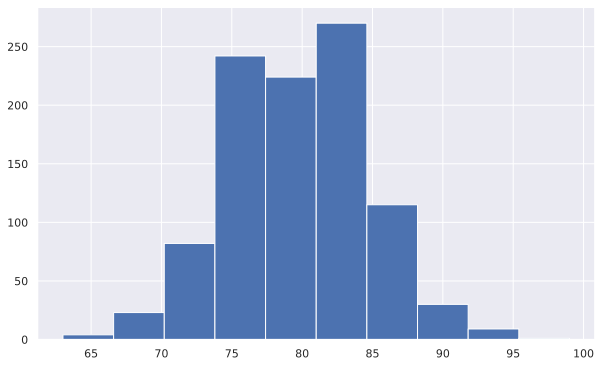

In [3]:
plt.hist(gen_pop)

Стандартизированная оценка (z-оценка, англ. standard score, z-score) — это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения. Это безразмерный статистический показатель, используемый для сравнения значений разной размерности или шкалой измерений.

In [7]:
sample = np.array([89,99,93,84,79,61,82,81,87,82])
sample.mean()

#z = 10**0.5*(sample.mean()-80)/5

z = np.sqrt(len(sample)) * (sample.mean() - gen_pop.mean()) / gen_pop.std()


print(f'значение z-статистики',z)
print(f'среднее значение мини-выборки', sample.mean())
print(f'среднее значение всей выборки', gen_pop.mean())

значение z-статистики 2.647172892588856
среднее значение мини-выборки 83.7
среднее значение всей выборки 79.586


In [8]:
# p-value calculate

p_value = 1 - (stats.norm.cdf(z) - stats.norm.cdf(-z))

print(p_value)

0.00811678431487195


Z-значение отстоит от 0 более чем на 2 сигмы, т.е. отклонение среднего балла 10 респондентов находится очень далеко от среднего бала генеральной совокупности, а вероятность того, что это отклонение произошло случайно, всего около 0.01.

 Другими словами, если взять 10 человек из совокупности людей, которые оценивают наше "старое" пиво как N(80, 5^{2}), то вероятность того, что эти 10 человек могут случайно дать среднюю оценку "новому" пиву равную 83.7 баллам составляет всего около 2%. Скорее всего, если мы проведем полномасштабный опрос, то увидим, что потребители не просто не заметят изменения качества пива, а даже отметят его небольшое улучшение. Круто.

In [9]:
sample.std(ddof=1)

np.float64(10.055954565441423)

Для того, чтобы учитывать поправку в методе std() пакета NumPy есть параметр ddof, который по умолчанию равен 0, но если мы применяем std() к небольшой выборке, то необходимо явно указать, что ddof=1.
Смещенная оценка!!

В конце концов, не является ли оценка стандартного отклонения генеральной совокупности значением отклонения выборки более разумным решением? Давайте выясним это! Для этого просто сравним то, как могут быть распределены две статистики: (напомню, что параметрами называют характеристики генеральной совокупности, а статистиками - характеристики выборок)

\begin{equation}
Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} \;
\end{equation}

\begin{equation}
T = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}.
\end{equation}

По сути мы просто придумали новую T-статистику, которая отличается от Z-статистики только тем, что в знаменателе стоит не \sigma генеральной совокупности, а s выборки.


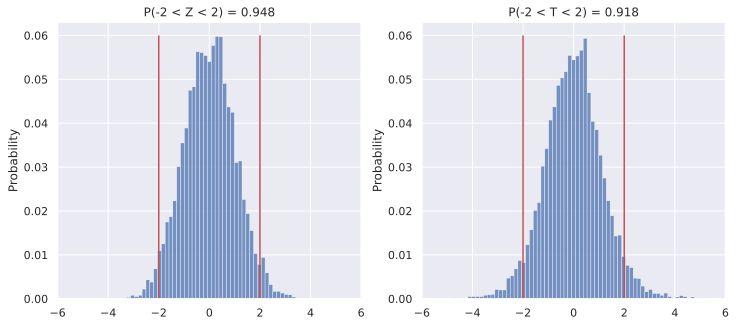

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))

N = 10000
samples = stats.norm.rvs(80, 5, (N, 10))
statistics = [lambda x: 10**0.5*(np.mean(x, axis=1) - 80)/5,
              lambda x: 10**0.5*(np.mean(x, axis=1) - 80)/np.std(x, axis=1, ddof=1)]
title = 'ZT'
bins = np.linspace(-6, 6, 80, endpoint=True)

for i in range(2):
    values = statistics[i](samples)
    sns.histplot(x=values ,stat='probability', bins=bins, ax=ax[i])
    p = values[(values > -2)&(values < 2)].size/N
    ax[i].set_title('P(-2 < {} < 2) = {:.3}'.format(title[i], p))
    ax[i].set_xlim(-6, 6)
    ax[i].vlines([-2, 2], 0, 0.06, color='r');

Просто мне кажется, что так можно продемонстрировать, как едва заметные черты могут оказаться чрезвычайно важными для исследователя. На что я хочу обратить ваше внимание? Во-первых, и слева, и справа мы видим свиду два одинаковых колоколообразных распределения. Вполне уместно предположить, что это два стандартных нормальных распределения, верно? Но, вот что любопытно, в N(0, 1)интервал [-2\sigma; 2\sigma]должен содержать около 95.5% всех значений. Для Z-статистики это требование выполняется, а для придуманной нами T-статистики не очень, потому что только 92-93% ее значений укладываются в заданный интервал. Казалось бы, что отличие не столь велико, чтобы заподозрить какую-то закономерность,

Вам не кажется, что у распределения T-статистик основание чуть шире? Это хорошо видно по выпирающим за красные линии, так называемым - хвостам. А то, что эти хвосты несколько больше, или как еще говорят - тяжелее, чем у нормального распределения, так же будет означать, что мы будем наблюдать несколько больше сильных отклонений от вершины распределения. Проще говоря, мы теперь можем учитывать дисперсию выборки при оценке параметров генеральной совокупности. Однако, мы так и не ответили на вопрос - хорошо ли, можно ли, да и вообще зачем оценивать \sigmaгенеральной совокупности значением стандартного отклонения sвыборки.

# stohastic system

In [ ]:
!pip install control --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
K = 0.1
T = 2
zeta = 0.1
num = np.array([K])
den = np.array([T**2, 2*T*zeta, 1])
W1 = control.tf(num, den)
W2 = control.tf([1],[0, 1])
Wfeedback = control.feedback(W1, W2, sign = -1)
print('W_замкнутая(s) = ', Wfeedback)

W_замкнутая(s) =  <TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        0.1
-------------------
4 s^2 + 0.4 s + 1.1



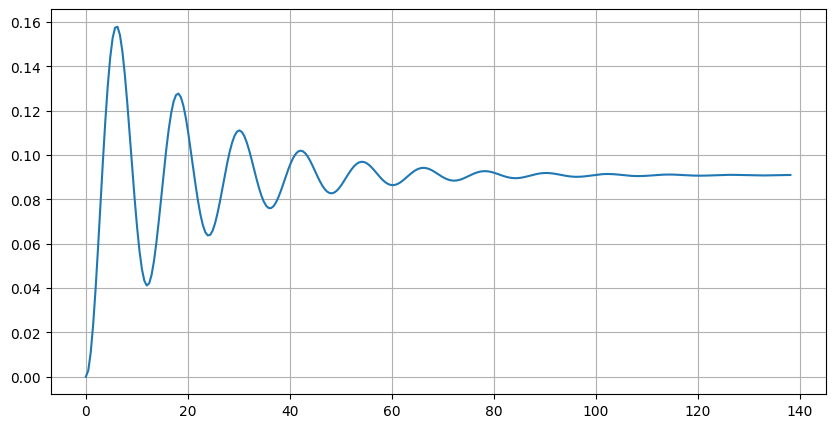

In [ ]:
#реакция на ступенчатое воздействие при К = 1
t, y = control.step_response(Wfeedback)
plt.figure(figsize=(10,5))
plt.plot(t, y)
plt.grid()
plt.show()

In [ ]:
sysABCD = control.tf2ss(Wfeedback)
print(sysABCD.A)
print(sysABCD.B)
print(sysABCD.C)

[[-0.1   -0.275]
 [ 1.     0.   ]]
[[1.]
 [0.]]
[[0.    0.025]]


In [ ]:
class ODESolver:
  def __init__(self, f):
    # Wrap user’s f in a new function that always
    # converts list/tuple to array (or let array be array)
    self.model = f
    self.f = lambda t, x: np.asarray(f(t, x), float)

  def set_initial_condition(self, x0):
    if np.isscalar(x0):
      self.neq = 1 # scalar ODE
      x0 = float(x0)
    else:
      x0 = np.asarray(x0)
      self.neq = x0.size
    self.x0 = x0

# Compute solution for t_span[0] <= t <= t_span[1], using N steps
  def solve(self, t_span, N):
    t0, T = t_span
    self.dt = (T - t0) / N
    self.t = np.zeros(N + 1) # N steps ~ N+1 time points
    if self.neq == 1:
      self.x = np.zeros(N + 1)
    else:
      self.x = np.zeros((N + 1, self.neq))

    msg = "Please set initial condition before calling solve"
    assert hasattr(self, "x0"), msg

    self.t[0] = t0
    self.x[0] = self.x0
    for n in range(N):
      self.n = n
      self.t[n + 1] = self.t[n] + self.dt
      self.x[n + 1] = self.advance()
    return self.t, self.x

  def advance(self):
    raise NotImplementedError("Advance method is not implemented in the base class")

In [ ]:
class RungeKutta4(ODESolver):
  def advance(self):
    x, f, n, t = self.x, self.f, self.n, self.t
    dt = self.dt
    dt2 = dt / 2.0
    k1 = f(t[n], x[n], )
    k2 = f(t[n] + dt2, x[n] + dt2 * k1, )
    k3 = f(t[n] + dt2, x[n] + dt2 * k2, )
    k4 = f(t[n] + dt, x[n] + dt * k3, )
    return x[n] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

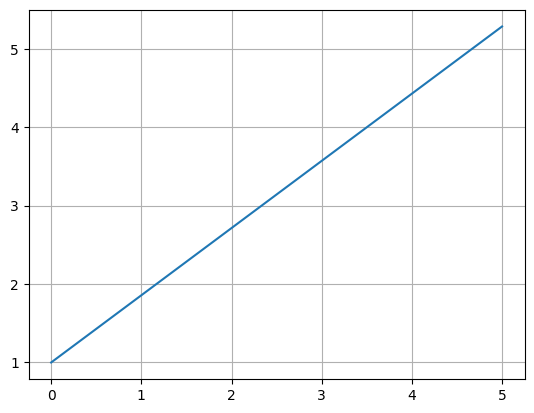

In [ ]:
def f(t, x):
  return x + np.cos(t)
t_span = (0, 5)
N = 25

rk4 = RungeKutta4(f)
rk4.set_initial_condition(x0 = 3)
t_solve, x_solve = rk4.solve(t_span, N)
#plt.plot(t3, u3, label="Runge-Kutta 4")
plt.plot(t_span, f(t_span, t_span))
plt.grid()

In [ ]:
class ABCDt:
  def __init__(self,mu,u,A,B):
    self.mu = mu
    self.u = u
    self.A = A
    self.B = B
  def __call__(self,t,x):
    time_delta = 1 - 0.5*np.sin(2*np.pi/4*t)
    dx1 = self.A[0,0] * x[0] * time_delta + self.A[0,1] * x[1] * time_delta + self.B[0,0]*self.u
    dx2 = self.A[1,0] * x[0] * time_delta + self.A[1,1] * x[1] * time_delta + self.B[1,0]*self.u
    return dx1,dx2

In [ ]:
class ABCD:
  def __init__(self,mu,u,A,B):
    self.mu = mu
    self.u = u
    self.A = A
    self.B = B
  def __call__(self,t,x):
    dx1 = self.A[0,0] * x[0] + self.A[0,1] * x[1] + self.B[0,0]*self.u
    dx2 = self.A[1,0] * x[0] + self.A[1,1] * x[1] + self.B[1,0]*self.u
    return dx1, dx2

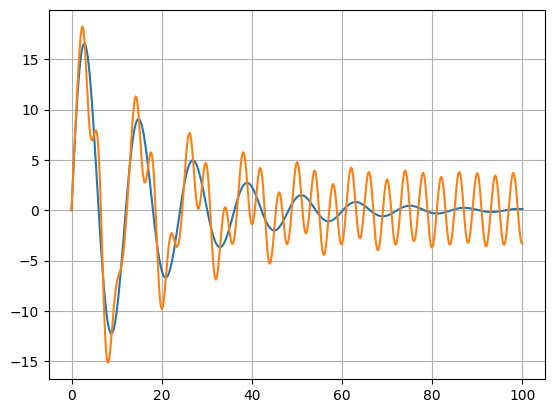

In [ ]:
u = 10
model = ABCD(mu=1 , u=u, A=sysABCD.A, B=sysABCD.B)
solver = RungeKutta4(model)
solver.set_initial_condition([0, 0])

model_t = ABCDt(mu = 1, u=u, A=sysABCD.A, B=sysABCD.B)
solver_t = RungeKutta4(model_t)
solver_t.set_initial_condition([0, 0])

t  , x = solver.solve(t_span=(0,100),N=500)
t_t, x_t = solver_t.solve(t_span=(0,100),N=500)

plt.plot(t,x[:,0], t_t, x_t[:,0])
plt.grid()
plt.show()

# Non-statonary timeseries

In [ ]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

**Stationary Process:** A process that generates a stationary series of observations.

**Stationary Model:** A model that describes a stationary series of observations.

**Trend Stationary:** A time series that does not exhibit a trend.

**Seasonal Stationary:** A time series that does not exhibit seasonality.

**Strictly Stationary:** A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

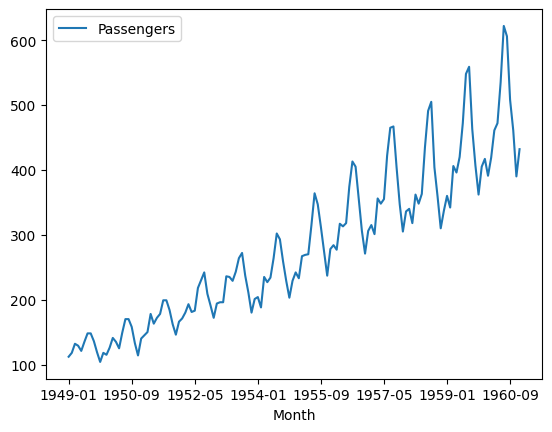

In [ ]:
series = read_csv('airline-passengers.csv', header=0, index_col=0)
X = series.values
series.plot()
plt.show()

In [ ]:
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
test_results = adfuller(x[:,0])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")
for key, value in test_results[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -1.1542933418017896e+16
p-value: 0.0
Critical thresholds:
	1%: -3.4437112724287253
	5%: -2.8674324209387345
	10%: -2.569908433637385
